# 📊 NeuroTradeX EDA: Price Movement & Volume Visualization
Explore key patterns and market behavior from the JPX dataset.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

## 📥 Load Data

In [6]:
# Adjust path as needed
df = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=['Date'])
df = df.sort_values(by=['SecuritiesCode', 'Date'])
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
3730,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092
5595,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100
7460,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295


## 💰 Dividend Distribution (Non-NaN Values Only)

In [7]:
# Filter for valid dividend data
# div_df = df[df['ExpectedDividend'].notnull()]

plt.figure(figsize=(10, 5))
sns.histplot(div_df['ExpectedDividend'], bins=50, kde=True)
plt.title('Distribution of Expected Dividends')
plt.xlabel('Expected Dividend')
plt.ylabel('Frequency')
plt.show()

NameError: name 'div_df' is not defined

<Figure size 1000x500 with 0 Axes>

# 🧠 NeuroTradeX: Future-Proofing for Missing Dividend Data
This notebook handles empty columns like `ExpectedDividend` gracefully and prepares your pipeline to merge future data from external APIs (Yahoo Finance, Alpha Vantage, etc.).

## 🔍 Check and Handle Empty Columns Gracefully

In [ ]:
# Check and prepare for missing dividend data
if 'ExpectedDividend' in df.columns:
    print("ExpectedDividend column found.")
    if df['ExpectedDividend'].notnull().sum() == 0:
        print("⚠️ All values are missing. Filling with 0 to preserve schema.")
        df['ExpectedDividend'] = 0
    df['HasDividend'] = df['ExpectedDividend'] > 0
else:
    print("❌ ExpectedDividend column not found in DataFrame.")

ExpectedDividend column found.


## 🌐 Template for Merging API Data in the Future

In [ ]:
# Placeholder for future API data merging
# from yfinance import download
# api_data = download('7203.T', start='2021-01-01', end='2022-01-01')
# df = df.merge(api_data, on='Date', how='left')

## ⚠️ Supervision Flag Frequency

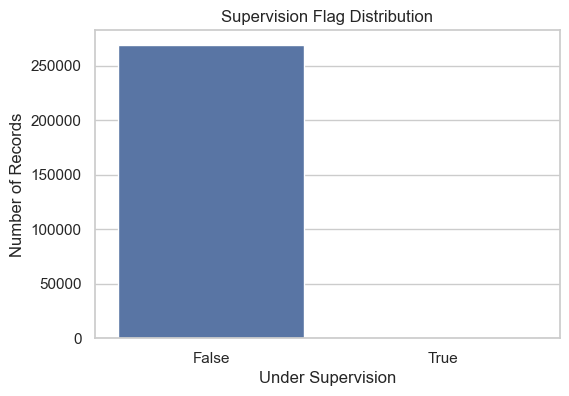

In [ ]:
flag_counts = df['SupervisionFlag'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=flag_counts.index.astype(str), y=flag_counts.values)
plt.title('Supervision Flag Distribution')
plt.xlabel('Under Supervision')
plt.ylabel('Number of Records')
plt.show()

## 📊 Return Distribution Heatmap (Sample Stocks)

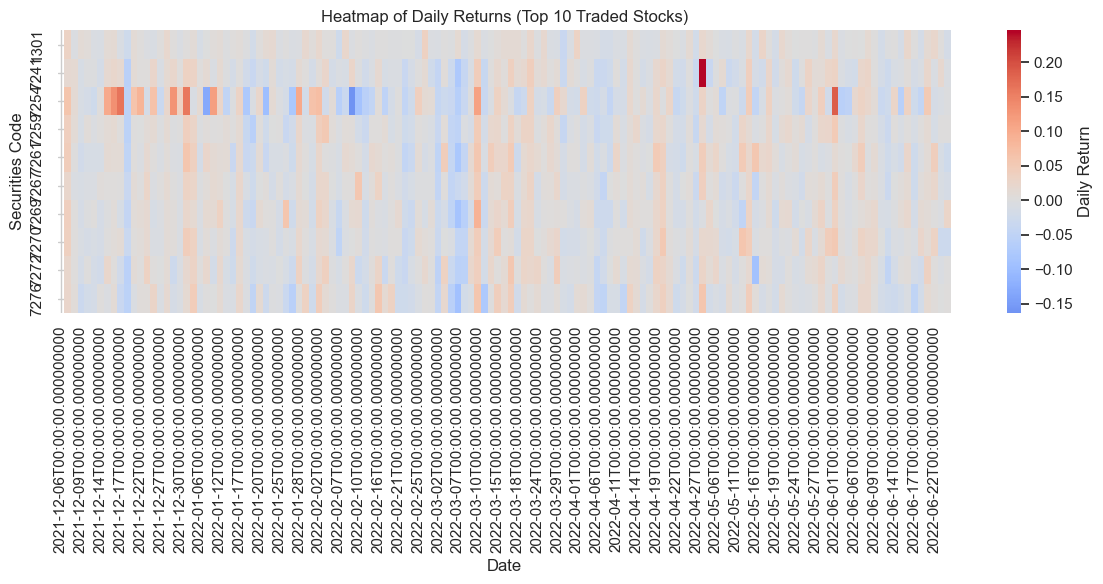

In [ ]:

# Pivot to create a date vs stock return heatmap
sample_codes = df['SecuritiesCode'].value_counts().head(10).index.tolist()
returns_df = df[df['SecuritiesCode'].isin(sample_codes)].copy()
returns_df['Return'] = returns_df.groupby('SecuritiesCode')['Close'].pct_change(fill_method=None)

pivot = returns_df.pivot(index='Date', columns='SecuritiesCode', values='Return')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot.T, cmap='coolwarm', center=0, cbar_kws={'label': 'Daily Return'})
plt.title('Heatmap of Daily Returns (Top 10 Traded Stocks)')
plt.xlabel('Date')
plt.ylabel('Securities Code')
plt.tight_layout()
plt.show()

## 📈 Plot Close Price Over Time for Sample Stock

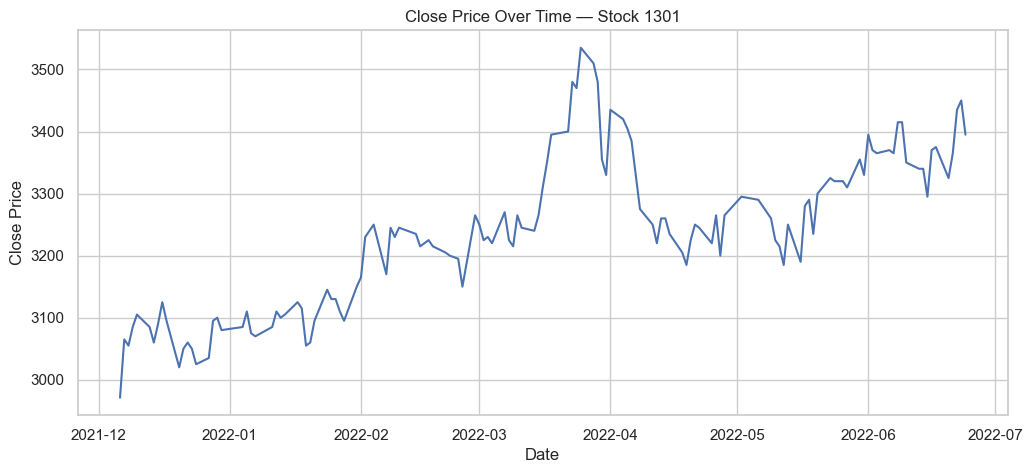

In [ ]:
# Pick one stock (most traded or random)
sample_code = df['SecuritiesCode'].value_counts().index[0]
sample_stock = df[df['SecuritiesCode'] == sample_code]

plt.figure(figsize=(12, 5))
plt.plot(sample_stock['Date'], sample_stock['Close'])
plt.title(f"Close Price Over Time — Stock {sample_code}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

## 🔁 Rolling Volatility & Moving Averages

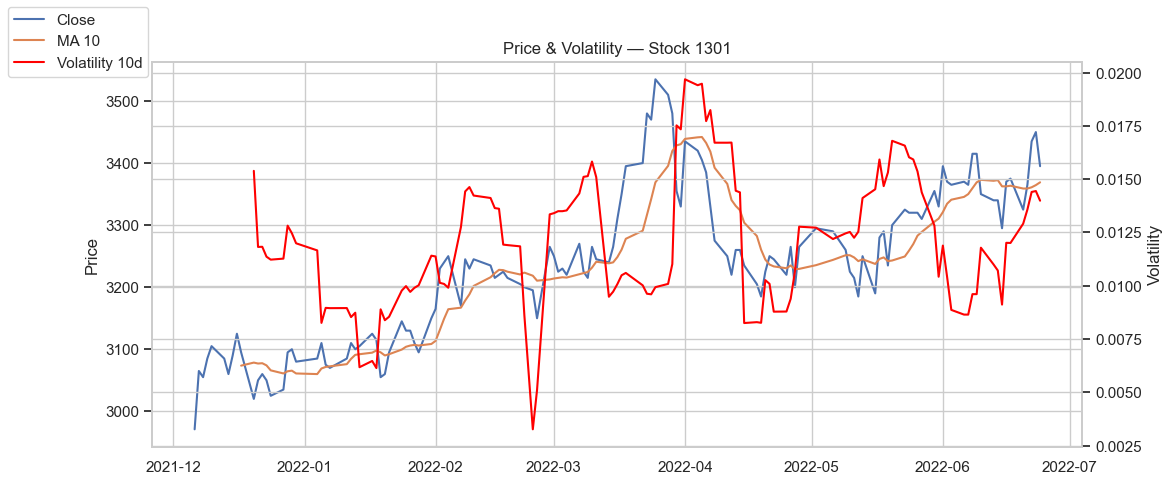

In [ ]:
# Compute moving average and rolling volatility
sample_stock = df[df['SecuritiesCode'] == sample_code].copy()

sample_stock['MA_10'] = sample_stock['Close'].rolling(window=10).mean()
sample_stock['Volatility_10'] = sample_stock['Close'].pct_change().rolling(window=10).std()


fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(sample_stock['Date'], sample_stock['Close'], label='Close')
ax1.plot(sample_stock['Date'], sample_stock['MA_10'], label='MA 10')
ax1.set_ylabel('Price')
ax2 = ax1.twinx()
ax2.plot(sample_stock['Date'], sample_stock['Volatility_10'], color='red', label='Volatility 10d')
ax2.set_ylabel('Volatility')
fig.legend(loc='upper left')
plt.title(f"Price & Volatility — Stock {sample_code}")
plt.show()

## 📦 Volume Analysis

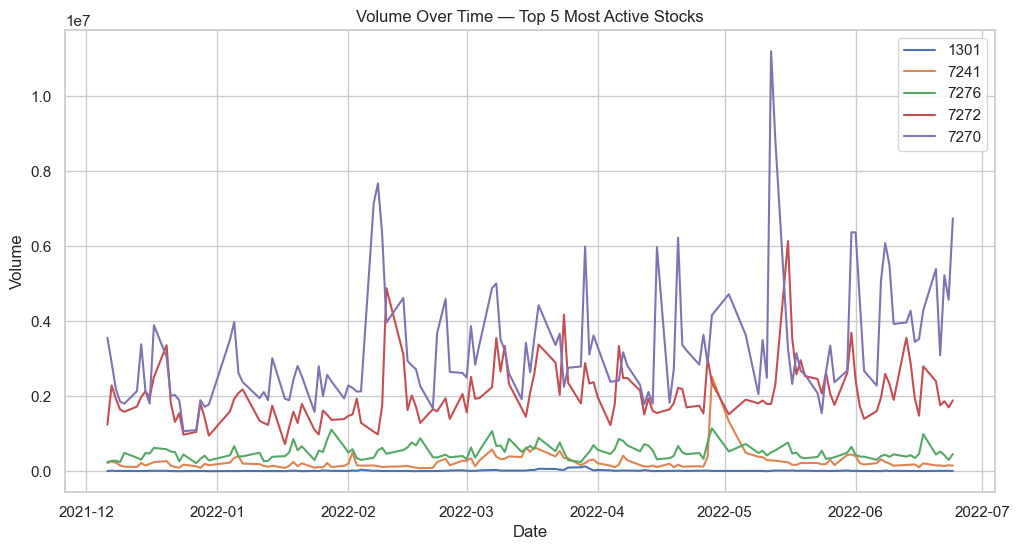

In [ ]:
top_5 = df['SecuritiesCode'].value_counts().head(5).index.tolist()
plt.figure(figsize=(12, 6))
for code in top_5:
    temp = df[df['SecuritiesCode'] == code]
    plt.plot(temp['Date'], temp['Volume'], label=str(code))
plt.title("Volume Over Time — Top 5 Most Active Stocks")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()